<a href="https://colab.research.google.com/github/chandan2294/TensorFlow/blob/main/TensorFlow(Custom_Models_and_Training).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Index:**

1. Overview
2. TensorFlow
  * Tensors and Operations
  * Using keras.backend
  * Tensors and NumPy
  * Type Conversions
3. Variables
4. Other Data Structures
  * Sparse tensors
  * Tensor arrays
  * Strings
  * String arrays
  * Ragged tensors
  * Sets
5. Customizing Models and Training Algorithms
  * Custom Loss Function
  * Saving/Loading Models with CUstom Objects
6. Other Custom Functions
7. Custom Metrics
  * Streaming metrics
8. Custom Layers
9. Custom Models
10. Losses and Models Based on Model Internals
11. Computing Gradients with Autodiff
12. Computing Gradients using Autodiff
13. TensorFlow Functions
  * TensorFlow Functions and Concrete Functions
  * Exploring Function Definitions and Graphs
  * How TensorFlow Function traces Python Functions to Extract their Computation Graphs
  * Using Autograph to Capture Control Flow
  * Handling Variables and Other Resources
14. TensorFlow Functions
15. Using TensorFlow Functions with tf.keras

**Overview:**

TensorFlow is a powerful library for numerical computation, particularly
well suited and fine-tuned for large-scale Machine Learning (but you could use
it for anything else that requires heavy computations).


TensorFlow offers many more features built on top of these core features: the most
important is of course tf.keras, but it also has data loading and preprocessing ops
(tf.data, tf.io, etc.), image processing ops (tf.image), signal processing ops
(tf.signal), and more.

In [2]:
import sys
assert sys.version_info >= (3, 5)

#Scikit-Learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
  %tensorflow_version 2.x
except Exception:
  pass

#TensorFlow >= 2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

#Common imports
import numpy as np
import os

#To make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

#To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc("xtick", labelsize = 12)
mpl.rc("ytick", labelsize = 12)

# **TensorFlow**

TensorFlow’s API revolves around tensors, which flow from operation to operation— hence the name TensorFlow. A tensor is very similar to a NumPy ndarray: it is usually
a multidimensional array, but it can also hold a scalar (a simple value, such as 34). These tensors will be important when we create custom cost functions, custom metrics, custom layers, and more, so let’s see how to create and manipulate them.


**Tensors and Operations**

You can create a tensor with tf.constant(). For example, here is a tensor representing a matrix with two rows and three columns of floats:

In [3]:
tf.constant([[1., 2., 3.], [4., 5., 6.]]) #Matrix


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [4]:
tf.constant(42) #Scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

Just like an ndarray, a tf.Tensor has a shape and a data type (dtype):

In [5]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t.shape

TensorShape([2, 3])

In [6]:
t.dtype

tf.float32

In [7]:
a = tf.constant([[1, 2, 2], [4, 5, 4]])
a.dtype

tf.int32

Indexing works much like in NumPy:

In [8]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [9]:
#All rows and all columns except first
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [10]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [11]:
t[..., 2, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[3.],
       [6.]], dtype=float32)>

In [12]:
t[1, ..., tf.newaxis]

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[4.],
       [5.],
       [6.]], dtype=float32)>

Most importantly, all sorts of tensor operations are available:

In [13]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [14]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [15]:
tf.add(t, 10) #Same as above

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [16]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [17]:
tf.multiply(t, 2)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [18]:
tf.subtract(t, 6)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-5., -4., -3.],
       [-2., -1.,  0.]], dtype=float32)>

In [19]:
tf.exp(t, 2)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[  2.7182817,   7.389056 ,  20.085537 ],
       [ 54.59815  , 148.41316  , 403.4288   ]], dtype=float32)>

**Using keras.backend**

The Keras API has its own low-level API, located in keras.backend. It includes functions
like square(), exp(), and sqrt(). In tf.keras, these functions generally just call
the corresponding TensorFlow operations. If you want to write code that will be
portable to other Keras implementations, you should use these Keras functions. However,
they only cover a subset of all functions available in TensorFlow.


In [20]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [21]:
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

**Tensors and NumPy**

Tensors play nice with NumPy: you can create a tensor from NumPy array, and vice versa. You can even apply TensorFlow operations to NumPy arrays amd NumPy operations to tensors:

In [22]:
a = np.array([2, 3, 5])
a

array([2, 3, 5])

In [23]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([2, 3, 5])>

In [24]:
t.numpy() #or np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [25]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [26]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([ 4,  9, 25])>

In [27]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

Notice that NumPy uses 64-bit precision by default, while Tensor‐
Flow uses 32-bit. This is because 32-bit precision is generally more
than enough for neural networks, plus it runs faster and uses less
RAM. So when you create a tensor from a NumPy array, make sure
to set dtype=tf.float32.

**Type Conversions**

Type conversions can significantly hurt performance, and they can easily go unnoticed when they are done automatically. To avoid this, Tensorflow does not perform any type of conversions automatically: it just raises an Exception if you try to execute an operation on tensors with incompatible types. For example, you cannot add a float tensor and an integer tensor, and you cannot even add a 32-bit float and 64-bit float:
 

In [28]:
try:
  tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [29]:
try:
  tf.constant(2.) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


You can use tf.cast() when you really need to convert types:

In [30]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

# **Variables**

The tf.Tensor values we've seen so far are immutable: you cannot modify them. This means that we cannot use regular tensors to implement weights in a neural network, since they need to be tweaked by backpropagation. Plus, other parameters may also need to change over time. What we need is ```tf.Variable```.




In [31]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

A ```tf.Variable``` acts much like a ```tf.Tensor```: you can perform the same operations with it, it plays nicely with NumPy as well.

In [32]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [33]:
v[0, 1].assign(42) #Assigning the value 42 in row 0 and column 1

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [34]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [35]:
try:
  v[1] = [7., 8., 9.]
except TypeError as ex:
  print(ex)

'ResourceVariable' object does not support item assignment


In [36]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates = [100, 200])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [37]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]], 
                              indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

# **Other Data Structures:**

* *Sparse tensors (```tf.SparseTensor```)*: Efficiently represent tensors containing mostly zeros. The tf.sparse package
contains operations for sparse tensors.

In [38]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                values=[1., 2., 3.],
                dense_shape=[3, 4])

In [39]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [40]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [41]:
s2 = s*2.0

In [42]:
try:
  s3 = s + 1
except TypeError as ex:
  print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'int'


In [43]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [44]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]], 
                     values = [1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [45]:
try:
  tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [46]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

* *Tensor arrays (```tf.TensorArray```)*: Are lists of tensors. They have a fixed size by default but can optionally be made
dynamic. All tensors they contain must have the same shape and data type.

In [47]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 6.]))
array = array.write(2, tf.constant([8., 2.]))

In [48]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3., 6.], dtype=float32)>

In [49]:
array.read(2)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([8., 2.], dtype=float32)>

In [50]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [51]:
mean, variance = tf.nn.moments(array.stack(), axes = 0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.33333334, 0.6666667 ], dtype=float32)>

In [52]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.22222221, 0.88888884], dtype=float32)>

* *Strings*

In [53]:
tf.constant(b"Hello World")

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello World'>

In [54]:
tf.constant("cafe")

<tf.Tensor: shape=(), dtype=string, numpy=b'cafe'>

In [55]:
u = tf.constant([ord(c) for c in "cafe"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 101], dtype=int32)>

In [56]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [57]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 101], dtype=int32)>

* *String arrays*:

In [58]:
p = tf.constant(['Cafe', 'Coffee', 'caffe', "咖啡"])

In [59]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [60]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 101], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 101], [21654, 21857]]>

* *Ragged tensors (```tf.RaggedTesnor```)*: Represent static lists of lists of tensors, where every tensor has the same shape
and data type. The tf.ragged package contains operations for ragged tensors.

In [61]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [62]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 101]]>


In [63]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis = 0))

<tf.RaggedTensor [[67, 97, 102, 101], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 101], [21654, 21857], [65, 66], [], [67]]>


In [64]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis = 1))

<tf.RaggedTensor [[67, 97, 102, 101, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 101], [21654, 21857, 72, 73]]>


In [65]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [66]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   101,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   101,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

* *Sets*:

In [67]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [68]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [69]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

# **Customizing Models and Training Algorithms**

Let's start by creating a custom loss function, which is a simple and common use case.

**Custom Loss Functions**

Suppose you want to train a regression model, but your training set is a bit noisy. Of
course, you start by trying to clean up your dataset by removing or fixing the outliers,
but that turns out to be insufficient; the dataset is still noisy. Which loss function
should you use? The mean squared error might penalize large errors too much and
cause your model to be imprecise. The mean absolute error would not penalize outliers
as much, but training might take a while to converge, and the trained model
might not be very precise. This is probably a good time to use the Huber loss instead of the good old MSE.

In [70]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target.reshape(-1, 1),
                                                              random_state = 42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_valid_scaled = scalar.transform(X_valid)
X_test_scaled = scalar.transform(X_test)

In [71]:
def huber_fn(y_true, y_pred):
  error = y_true - y_pred
  is_small_error = tf.abs(error) < 1
  squared_loss = tf.square(error)/2
  linear_loss = tf.abs(error) - 0.5
  return tf.where(is_small_error, squared_loss, linear_loss)

Text(0.5, 1.0, 'Huber loss')

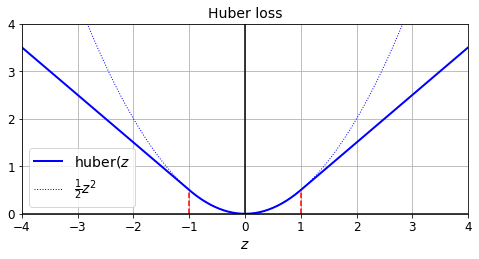

In [72]:
plt.figure(figsize = (8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth = 2, label = "huber($z$")
plt.plot(z, z**2/2, "b:", linewidth = 1, label = r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize = 14) 

In [73]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([keras.layers.Dense(30, activation="selu",
                                                    kernel_initializer="lecun_normal",
                                                    input_shape=input_shape),
                                 keras.layers.Dense(1)])

In [74]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [75]:
model.fit(X_train_scaled, y_train, epochs=2, 
          validation_data = (X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.6235 - mae: 0.9953 - val_loss: 0.2862 - val_mae: 0.5866
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2197 - mae: 0.5177 - val_loss: 0.2382 - val_mae: 0.5281


**Saving/Loading Models with Custom Objects**

In [76]:
model.save("my_model_with_a_custom_loss.h5")

In [77]:
model = keras.models.load_model("my_model_with_a_custom_loss.h5", 
                                custom_objects={"huber_fn":huber_fn})

In [78]:
model.fit(X_train_scaled, y_train, epochs = 2, 
          validation_data = (X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2054 - mean_absolute_error: 0.4982 - val_loss: 0.2209 - val_mean_absolute_error: 0.5050
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1999 - mean_absolute_error: 0.4900 - val_loss: 0.2127 - val_mean_absolute_error: 0.4986


In [79]:
def create_huber(threshold=1.0):
  def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < threshold
    squared_loss = tf.square(error)/2
    linear_loss = threshold * tf.abs(error) - threshold**2/2
    return tf.where(is_small_error, squared_loss, linear_loss)
  return huber_fn

In [80]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=['mae'])

In [81]:
model.fit(X_train_scaled, y_train, epochs = 2, 
          validation_data = (X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2226 - mae: 0.4892 - val_loss: 0.2540 - val_mae: 0.4907
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2184 - mae: 0.4844 - val_loss: 0.2372 - val_mae: 0.4879


In [82]:
class HuberLoss(keras.losses.Loss):
  def __init__(self, threshold=1.0, **kwargs):
    self.threshold = threshold
    super().__init__(**kwargs)
  def call(self, y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < self.threshold
    squared_loss = tf.square(error)/2
    linear_loss = self.threshold*tf.abs(error) - self.threshold**2/2
    return tf.where(is_small_error, squared_loss, linear_loss)
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, "threshold": self.threshold}

Let’s walk through this code:

* The constructor accepts \*\*kwargs and passes them to the parent constructor,
which handles standard hyperparameters: the name of the loss and the reduction
algorithm to use to aggregate the individual instance losses. By default, it is
"sum_over_batch_size", which means that the loss will be the sum of the
instance losses, weighted by the sample weights, if any, and divided by the batch
size (not by the sum of weights, so this is not the weighted mean). Other possible
values are "sum" and "none".
* The ```call()``` method takes the labels and predictions, computes all the instance
losses, and returns them.
* The ```get_config()``` method returns a dictionary mapping each hyperparameter
name to its value. It first calls the parent class’s get_config() method, then adds
the new hyperparameters to this dictionary (note that the convenient {**x} syntax
was added in Python 3.5).

In [83]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation='selu',
                                                    kernel_initializer = "lecun_normal",
                                                    input_shape = input_shape),
                                 keras.layers.Dense(1)
])

In [84]:
model.compile(loss = HuberLoss(2.), optimizer="nadam", metrics=['mae'])

In [85]:
model.fit(X_train_scaled, y_train, epochs = 2, 
          validation_data = (X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.7864 - mae: 0.9470 - val_loss: 0.4276 - val_mae: 0.6122
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2497 - mae: 0.5204 - val_loss: 0.3437 - val_mae: 0.5537


In [86]:
model.save("my_model_with_a_custom_loss_class.h5")

In [87]:
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5", # TODO: check PR #25956
                                custom_objects={"HuberLoss": HuberLoss})

In [88]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2328 - mean_absolute_error: 0.5019 - val_loss: 0.2627 - val_mean_absolute_error: 0.5015
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2234 - mean_absolute_error: 0.4931 - val_loss: 0.2037 - val_mean_absolute_error: 0.4739


In [89]:
model.loss.threshold

2.0

# **Other Custom Functions**

In [90]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
def my_softplus(z): #return value is just tf.nn.softplus(z)
  return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
  stddev = tf.sqrt(2./(shape[0] + shape[1]))
  return tf.random.normal(shape, stddev=stddev, dtype = dtype)

def my_l1_regularizer(weights):
  return tf.reduce_sum(tf.abs(0.01*weights))

def my_positive_weights(weights):
  return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [92]:
layer = keras.layers.Dense(1, activation=my_softplus, 
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer = my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [93]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [94]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation="selu",
                                                    kernel_initializer="lecun_normal",
                                                    input_shape=input_shape),
                                 keras.layers.Dense(1, activation=my_softplus,
                                                    kernel_regularizer = my_l1_regularizer,
                                                    kernel_constraint = my_positive_weights,
                                                    kernel_initializer=my_glorot_initializer)])

In [95]:
model.compile(loss="mse", optimizer='nadam', metrics = ['mae'])

In [96]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data = (X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [97]:
model.save("my_model_with_many_custom_parts.h5")

In [98]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects = {
        "my_l1_regularizer": my_l1_regularizer,
        "my_positive_weights": my_positive_weights,
        "my_glorot_initializer": my_glorot_initializer,
        "my_softplus": my_softplus
    }
)

In [99]:
class MyL1Regularizer(keras.regularizers.Regularizer):
  def __init__(self, factor):
    self.factor = factor
  def __call__(self, weights):
    return tf.reduce_sum(tf.abs(self.factor*weights))
  def get_config(self):
    return {"factor": self.factor}

In [100]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [101]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [102]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [103]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [104]:
model.save("my_model_with_many_custom_parts.h5")

In [105]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

# **Custom Metrics**

Losses and metrics are conceptually not the same thing: losses (e.g., cross entropy)
are used by Gradient Descent to train a model, so they must be differentiable (at least
where they are evaluated), and their gradients should not be 0 everywhere. Plus, it’s
OK if they are not easily interpretable by humans. In contrast, metrics (e.g., accuracy)
are used to evaluate a model: they must be more easily interpretable, and they can be
non-differentiable or have 0 gradients everywhere.

In [106]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [107]:
model = keras.models.Sequential([
                               keras.layers.Dense(30, activation='selu',
                                                  kernel_initializer="lecun_normal",
                                                  input_shape=input_shape),
                               keras.layers.Dense(1)
])

In [108]:
model.compile(loss='mse', optimizer='nadam', metrics=[create_huber(2.0)])

In [109]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 2.0982 - huber_fn: 0.9192
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.6052 - huber_fn: 0.2733



**Warning:** if you use the same function as the loss and a metric, you may be surprised to see different results. This is generally just due to floating point precision errors: even though the mathematical equations are equivalent, the operations are not run in the same order, which can lead to small differences. Moreover, when using sample weights, there's more than just precision errors:

* The loss since the start of the epoch is the mean of all batch losses seen so far. Each batch loss is the sum of the weighted instance losses divided by the batch size (not the sum of weights, so the batch loss is not the weighted mean of the losses).
* The metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.

If you do the math, you will find that loss = metric * mean of sample weights (plus some floating point precision error).

In [110]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [111]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1175 - huber_fn: 0.2399
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1131 - huber_fn: 0.2297


In [112]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.11749906837940216, 0.11906626312604573)

**Streaming metrics:**

For each batch during training, Keras will compute this metric and keep track of its
mean since the beginning of the epoch. Most of the time, this is exactly what you
want. But not always! Consider a binary classifier’s precision, for example. Precision is the number of true positives divided by the number of positive
predictions (including both true positives and false positives). Suppose the model
made five positive predictions in the first batch, four of which were correct: that’s 80%
precision. Then suppose the model made three positive predictions in the second
batch, but they were all incorrect: that’s 0% precision for the second batch. If you just
compute the mean of these two precisions, you get 40%. But wait a second—that’s not
the model’s precision over these two batches! Indeed, there were a total of four true
positives (4 + 0) out of eight positive predictions (5 + 3), so the overall precision is
50%, not 40%. What we need is an object that can keep track of the number of true
positives and the number of false positives and that can compute their ratio when
requested. This is precisely what the keras.metrics.Precision class does:

In [113]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [114]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [115]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [116]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [117]:
precision.reset_states()

Creating a streaming metric:

In [118]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        #self.huber_fn = create_huber(threshold) # TODO: investigate why this fails
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def huber_fn(self, y_true, y_pred): # workaround
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [119]:
m = HuberMetric(2.)

#total = 2*|10 - 2| - 2^2/2 = 14
#count = 1
#result = 14/1 = 14

m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [120]:
#total = total + (|1-0|^2/2) + (2*|9.25 - 5| - 2^2/2) = 14+7 = 21
#count = count + 2 = 3
#result = total/count = 21/3 = 7

m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [121]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [122]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

Let's check that the ```HuberMetric``` class works well:

In [123]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [124]:
model = keras.models.Sequential([keras.layers.Dense(30, activation='selu',
                                                    kernel_initializer="lecun_normal",
                                                    input_shape=input_shape),
                                 keras.layers.Dense(1)])

In [125]:
model.compile(loss = create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [126]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.8707 - huber_metric: 0.8707
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2595 - huber_metric: 0.2595


In [127]:
model.save("my_model_with_a_custom_metric.h5")

In [128]:
model = keras.models.load_model("my_model_with_a_custom_metric.h5",           # TODO: check PR #25956
                                custom_objects={"huber_fn": create_huber(2.0),
                                                "HuberMetric": HuberMetric})

In [129]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2350 - huber_metric: 0.2350
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2278 - huber_metric: 0.2278


In [130]:
model.metrics[-1].threshold

2.0

Looks like it works fine! More simply, we could have created the class like this:

In [131]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

This class handles shapes better, and it also supports sample weights


In [132]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [133]:
model = keras.models.Sequential([keras.layers.Dense(30, activation='selu', kernel_initializer="lecun_normal", input_shape=input_shape),
                                 keras.layers.Dense(1)]
)

In [134]:
model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[HuberMetric(2.0)])

In [135]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs = 2, 
                    sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.4455 - HuberMetric: 0.8978
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1305 - HuberMetric: 0.2631


In [136]:
history.history['loss'][0], history.history['HuberMetric'][0] * sample_weight.mean()

(0.44554394483566284, 0.44554404180100277)

In [137]:
model.save("my_model_with_a_custom_metric_v2.h5")

In [138]:
model = keras.models.load_model("my_model_with_a_custom_metric_v2.h5",        # TODO: check PR #25956
                                custom_objects={"HuberMetric": HuberMetric})

In [139]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs = 2)

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2377 - HuberMetric: 0.2377
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2279 - HuberMetric: 0.2279


# **Custom Layers:**

You may occasionally want to build an architecture that contains an exotic layer for
which TensorFlow does not provide a default implementation. In this case, you will
need to create a custom layer. Or you may simply want to build a very repetitive
architecture, containing identical blocks of layers repeated many times, and it would
be convenient to treat each block of layers as a single layer. For example, if the model
is a sequence of layers A, B, C, A, B, C, A, B, C, then you might want to define a custom
layer D containing layers A, B, C, so your model would then simply be D, D, D.
Let’s see how to build custom layers.

First, some layers have no weights, such as keras.layers.Flatten or keras.lay
ers.ReLU. If you want to create a custom layer without any weights, the simplest
option is to write a function and wrap it in a keras.layers.Lambda layer. For example,
the following layer will apply the exponential function to its inputs:

In [140]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [141]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

Adding an exponential layer at the output of a regression model can be useful if the values to predict are positive and with very different scales (e.g., 0.001, 10., 10000):

In [142]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [143]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/5
162/162 [==============================] - 0s 739us/step - loss: nan


nan

In [144]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

Let’s walk through this code:

* The constructor takes all the hyperparameters as arguments (in this example,
```units``` and ```activation```), and importantly it also takes a **kwargs argument. It
calls the parent constructor, passing it the kwargs: this takes care of standard
arguments such as ```input_shape```, trainable, and name. Then it saves the hyperparameters
as attributes, converting the ```activation``` argument to the appropriate
activation function using the ```keras.activations.get()``` function (it accepts
functions, standard strings like "relu" or "selu", or simply None)
* The ```build()``` method’s role is to create the layer’s variables by calling the
add_weight() method for each weight. The build() method is called the first
time the layer is used. At that point, Keras will know the shape of this layer’s
inputs, and it will pass it to the ```build()``` method, which is often necessary to create
some of the weights. For example, we need to know the number of neurons in
the previous layer in order to create the connection weights matrix (i.e., the
"kernel"): this corresponds to the size of the last dimension of the inputs. At the
end of the ```build()``` method (and only at the end), you must call the parent’s ```build()``` method: this tells Keras that the layer is built (it just sets
```self.built=True```).
* The ```call()``` method performs the desired operations. In this case, we compute
the matrix multiplication of the inputs X and the layer’s kernel, we add the bias
vector, and we apply the activation function to the result, and this gives us the
output of the layer.
* The ```compute_output_shape()``` method simply returns the shape of this layer’s
outputs. In this case, it is the same shape as the inputs, except the last dimension
is replaced with the number of neurons in the layer. Note that in ```tf.keras```, shapes
are instances of the ```tf.TensorShape``` class, which you can convert to Python lists
using ```as_list()```.
* The ```get_config()``` method is just like in the previous custom classes. Note that
we save the activation function’s full configuration by calling ```keras.activa
tions.serialize()```.

In [145]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [146]:
model = keras.models.Sequential([MyDense(30, activation="relu", input_shape = input_shape),
                                 MyDense(1)])

In [147]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data = (X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 2.2563 - val_loss: 0.9472
Epoch 2/2
162/162 [==============================] - 0s 853us/step - loss: 0.5474


0.5473727583885193

In [148]:
model.save("my_model_with_a_custom_layer.h5")

In [149]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects = {"MyDense":MyDense})

In [150]:
class MyMultiLayer(keras.layers.Layer):
  def call(self, X):
    X1, X2 = X
    return X1 + X2, X1*X2

  def compute_output_shape(self, batch_input_shape):
    batch_input_shape1, batch_input_shape2 = batch_input_shape
    return [batch_input_shape1, batch_input_shape2]

In [151]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [152]:
inputs1 = keras.layers.Input(shape = [2])
inputs2 = keras.layers.Input(shape = [2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

Let's create a layer with a different behavior during training and testing:

In [153]:
class AddGaussianNoise(keras.layers.Layer):
  def __init__(self, stddev, **kwargs):
    super().__init__(**kwargs)
    self.stddev = stddev

  def call(self, X, training = None):
    if training:
      noise = tf.random.normal(tf.shape(X), stddev = self.stddev)
      return X+noise 
    else:
      return X

  def compute_output_shape(self, batch_input_shape):
    return batch_input_shape

In [154]:
model.compile(loss = "mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs = 2, 
          validation_data = (X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.4904 - val_loss: 0.5329
Epoch 2/2
162/162 [==============================] - 0s 818us/step - loss: 0.3990


0.39900389313697815

# **Custom Models**:

In [155]:
X_new_scaled = X_test_scaled

In [156]:
class ResidualBlock(keras.layers.Layer):
  def __init__(self, n_layers, n_neurons, **kwargs):
    super().__init__(**kwargs)
    self.hidden = [keras.layers.Dense(n_neurons, activation='elu', kernel_initializer='he_normal')
    for _ in range(n_layers)]

  def call(self, inputs):
    Z = inputs
    for layer in self.hidden:
      Z = layer(Z)
    return inputs + Z

In [157]:
class ResidualRegressor(keras.models.Model):
  def __init__(self, output_dim, **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(30, activation = "elu", kernel_initializer="he_normal")
    self.block1 = ResidualBlock(2, 30)
    self.block2 = ResidualBlock(2, 30)
    self.out = keras.layers.Dense(output_dim)

  def call(self, inputs):
    Z = self.hidden1(inputs)
    for _ in range(1 + 3):
      Z = self.block1(Z)
    Z = self.block2(Z)
    return self.out(Z)

In [158]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [159]:
model = ResidualRegressor(1)
model.compile(loss='mse', optimizer='nadam')
history = model.fit(X_train_scaled, y_train, epochs = 5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 9.1324
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.0578
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.8866
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5842
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 0.6481


In [160]:
model.save("my_custom_model.ckpt")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_custom_model.ckpt/assets


In [161]:
model = keras.models.load_model("my_custom_model.ckpt")

In [162]:
history = model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 0.9154
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4779
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4867
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5609
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5365


In [163]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [164]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([keras.layers.Dense(30, activation="elu",
                                                    kernel_initializer="he_normal"), 
                                 block1, block1, block1, block1,
                                 ResidualBlock(2, 30),
                                 keras.layers.Dense(1)])

In [165]:
model.compile(loss = "mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs = 5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 0s 1ms/step - loss: 0.8695
Epoch 2/5
363/363 [==============================] - 1s 1ms/step - loss: 0.4720
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5537
Epoch 4/5
363/363 [==============================] - 1s 1ms/step - loss: 0.3809
Epoch 5/5
162/162 [==============================] - 0s 871us/step - loss: 0.4852


# **Losses and Metrics Based on Model Internals**

The custom losses and metrics we defined earlier were all based on the labels and the predictions (an optionally sample weights). There will be times when you want to define losses based on other parts of your model, such as the weights or activations of its hidden layers. This may be useful for regularization purposes or to monitor some internal aspect of your model.

To define a custom loss based on models internals, compute it based on any part of the model you want, then pass the result to the ```add_loss()``` method. For example, let's build a custom regression MLP model composed of a stack of five hidden layers plus an output layer. This custom model will also have an auxiliary output on top of the upper hidden layer. The loss associated to this auxiliary output will be called that *reconstruction loss*: it is the mean squared difference between the reconstruction and the inputs. By adding this reconstruction loss to the main loss, we will encourage the model to preserve as much information as possible through the hidden layers - even information that is not directly useful for the regression task itself. In practice, this loss sometimes improves generalization (it is a regularization loss).

In [166]:
class ReconstructingRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        # TODO: check https://github.com/tensorflow/tensorflow/issues/26260
        self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        return self.out(Z)

Let’s go through this code:

* The constructor creates the DNN with five dense hidden layers and one dense
output layer.
• The ```build()``` method creates an extra dense layer which will be used to reconstruct
the inputs of the model. It must be created here because its number of units
must be equal to the number of inputs, and this number is unknown before the
```build()``` method is called.
* The ```call()``` method processes the inputs through all five hidden layers, then
passes the result through the reconstruction layer, which produces the reconstruction.
* Then the ```call()``` method computes the reconstruction loss (the mean squared
difference between the reconstruction and the inputs), and adds it to the model’s
list of losses using the ```add_loss()``` method.11 Notice that we scale down the
reconstruction loss by multiplying it by 0.05 (this is a hyperparameter you can
tune). This ensures that the reconstruction loss does not dominate the main loss.
* Finally, the ```call()``` method passes the output of the hidden layers to the output
layer and returns its output.

In [167]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [168]:
#model = ReconstructingRegressor(1)
#model.compile(loss="mse", optimizer="nadam")
#history = model.fit(X_train_scaled, y_train, epochs=2)
#y_pred = model.predict(X_test_scaled)

# **Computing Gradients with Autodiff**

To understand how to use autodiff to compute gradients automatically, let's consider a simple toy function:

In [169]:
def f(w1, w2):
  return 3*w1**2 + 2*w1*w2

We can analytically find that the partial derivative of this function
with regard to w1 is 6 * w1 + 2 * w2. You can also find that its partial derivative
with regard to w2 is 2 * w1. For example, at the point (w1, w2) = (5, 3), these partial
derivatives are equal to 36 and 10, respectively, so the gradient vector at this point
is (36, 10). But if this were a neural network, the function would be much more complex,
typically with tens of thousands of parameters, and finding the partial derivatives
analytically by hand would be an almost impossible task. One solution could be
to compute an approximation of each partial derivative by measuring how much the
function’s output changes when you tweak the corresponding parameter:

In [170]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2))/eps

36.000003007075065

In [171]:
(f(w1, w2+eps) - f(w1, w2))/eps

10.000000003174137

Looks about right! This works rather well and is easy to implement, but it is just an
approximation, and importantly you need to call ```f()``` at least once per parameter (not
twice, since we could compute ```f(w1, w2)``` just once). Needing to call ```f()``` at least once
per parameter makes this approach intractable for large neural networks. So instead,
we should use autodiff. TensorFlow makes this pretty simple:

In [172]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
  z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

We first define two variables ```w1``` and ```w2```, then we create a ```tf.GradientTape``` context
that will automatically record every operation that involves a variable, and finally we
ask this tape to compute the gradients of the result z with regard to both variables
```[w1, w2]```.

In [173]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [174]:
with tf.GradientTape(persistent = True) as tape:
  z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)

In [175]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [176]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
  z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [177]:
gradients

[None, None]

In [178]:
with tf.GradientTape() as tape:
  tape.watch(c1)
  tape.watch(c2)
  z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [179]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [180]:
with tf.GradientTape() as tape:
  z1 = f(w1, w2 + 2.)
  z2 = f(w1, w2 + 5.)
  z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [181]:
with tf.GradientTape(persistent = True) as tape:
  z1 = f(w1, w2 + 2.)
  z2 = f(w1, w2 + 5.)
  z3 = f(w1, w2 + 7.)

tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis = 0)
del tape

In [182]:
with tf.GradientTape(persistent=True) as hessian_tape:
  with tf.GradientTape() as jacobian_tape:
    z = f(w1, w2)
  jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
for jacobian in jacobians]
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In [183]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [184]:
def f(w1, w2):
  return 3*w1**2 + tf.stop_gradient(2*w1*w2)

with tf.GradientTape() as tape:
  z = f(w1, w2)

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [185]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
  z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [186]:
tf.math.log(tf.exp(tf.constant(30., dtype=tf.float32)) + 1.)

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [187]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
  z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [188]:
@tf.custom_gradient
def my_better_softplus(z):
  exp = tf.exp(z)
  def my_softplus_gradients(grad):
    return grad/(1+1/exp)
  return tf.math.log(exp + 1), my_softplus_gradients

In [189]:
def my_better_softplus(z):
  return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [190]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
  z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

# **Computing Gradients Using Autodiff**


In [191]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [192]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation = "elu",
                                                    kernel_initializer="he_normal",
                                                    kernel_regularizer=l2_reg),
                                 keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [193]:
def random_batch(X, y, batch_size=32):
  idx = np.random.randint(len(X), size=batch_size)
  return X[idx], y[idx]

In [194]:
def print_status_bar(iteration, total, loss, metrics = None):
  metrics = "-".join(["{}: {:.4f}".format(m.name, m.result()) for m in [loss] + (metrics or [])])
  end = "" if iteration < total else "\n"
  print("\r{}/{} - ".format(iteration, total) + metrics, end = end)

In [195]:
import time

mean_loss = keras.metrics.Mean(name = "loss")
mean_square = keras.metrics.Mean(name = "mean_square")
for i in range(1, 50 + 1):
  loss = 1/i
  mean_loss(loss)
  mean_square(i**2)
  print_status_bar(i, 50, mean_loss, [mean_square])
  time.sleep(0.05)

50/50 - loss: 0.0900-mean_square: 858.5000


In [196]:
#Fancier version with a progress bar:
def progress_bar(iteration, total, size=30):
  running = iteration < total
  c = ">" if running else "="
  p = (size - 1)*iteration//total
  fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
  params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
  return fmt.format(*params)

In [197]:
progress_bar

<function __main__.progress_bar>

In [198]:
def print_status_bar(iteration, total, loss, metrics = None, size = 30):
  metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result()) for m in [loss] + (metrics or [])])
  end = "" if iteration < total else "\n"
  print("r{} - {}".format(progress_bar(iteration, total), metrics), end = end)

In [199]:
mean_loss = keras.metrics.Mean(name = "loss")
mean_square  =keras.metrics.Mean(name = "mean_square")
for i in range(1, 50 + 1):
  loss = 1/i
  mean_loss(loss)
  mean_square(i**2)
  print_status_bar(i, 50, mean_loss, [mean_square])
  time.sleep(0.05)

r 1/50 [>.............................] - loss: 1.0000 - mean_square: 1.0000r 2/50 [=>............................] - loss: 0.7500 - mean_square: 2.5000r 3/50 [=>............................] - loss: 0.6111 - mean_square: 4.6667r 4/50 [==>...........................] - loss: 0.5208 - mean_square: 7.5000r 5/50 [==>...........................] - loss: 0.4567 - mean_square: 11.0000r 6/50 [===>..........................] - loss: 0.4083 - mean_square: 15.1667r 7/50 [====>.........................] - loss: 0.3704 - mean_square: 20.0000r 8/50 [====>.........................] - loss: 0.3397 - mean_square: 25.5000r 9/50 [=====>........................] - loss: 0.3143 - mean_square: 31.6667r10/50 [=====>........................] - loss: 0.2929 - mean_square: 38.5000r11/50 [======>.......................] - loss: 0.2745 - mean_square: 46.0000r12/50 [======>.......................] - loss: 0.2586 - mean_square: 54.1667r13/50 [=======>......................] - loss: 0.2446 - mean_square: 63.0000r14

In [200]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [201]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train)//batch_size
optimizer = keras.optimizers.Nadam(lr = 0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [ ]:
for epoch in range(1, n_epochs + 1):
  print("Epoch {}/{}".format(epoch, n_epochs))
  for step in range(1, n_steps + 1):
    X_batch, y_batch = random_batch(X_train_scaled, y_train)
    with tf.GradientTape() as tape:
      y_pred = model(X_batch)
      main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
      loss = tf.add_n([main_loss] + model.losses)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    for variable in model.variables:
      if variable.constraint is not None:
        variable.assign(variable.constraint(variable))
    mean_loss(loss)
    for metric in metrics:
      metric(y_batch, y_pred)
    print_status_bar(step*batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
      metric.reset_states()

# **TensorFlow Functions**

In [203]:
def cube(x):
  return x**3

In [204]:
cube(2)

8

In [205]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [206]:
tf_cube = tf.function(cube)
tf_cube

In [207]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [208]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

**TF Functions and Concrete Functions**

In [209]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function.graph

In [210]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [211]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

**Exploring Function Definitions and Graphs**

In [212]:
concrete_function.graph

In [213]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [215]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [216]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [217]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [218]:
concrete_function.graph.get_tensor_by_name("Identity:0")

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [219]:
concrete_function.function_def.signature

name: "__inference_cube_621963"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

**How TensorFlow Function traces Python Functions to Extract their Computation Graphs**

In [220]:
@tf.function
def tf_cube(x):
  print("print:", x)
  return x**3

In [221]:
result = tf_cube(tf.constant(2.0))

print: Tensor("x:0", shape=(), dtype=float32)


In [222]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [ ]:
result = tf_cube(2)
result = tf_cube(3)
result = tf_cube(tf.constant([[1., 2.]])) #New Shape: trace!
result = tf_cube(tf.constant([[3., 4.], [5., 6.]])) #New shape: trace!
result = tf_cube(tf.constant([[7., 8.], [9., 10.], [11., 12.]])) #no trace

It is also possible to specify a particular input signature:

In [224]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
  print("Tracing", images)
  return images[:, ::2, ::2] #drop half the rows and columns

In [225]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [226]:
img_batch_1 = tf.random.uniform(shape = [100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1) #Traces the function
preprocessed_images = shrink(img_batch_2) #Reuses the same concrete function

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [227]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
  preprocessed_images = shrink(img_batch_3) #rejects unexpected types or shapes
except ValueError as ex:
  print(ex)

Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.7413678  0.62854624]
  [0.01738465 0.3431449 ]]

 [[0.51063764 0.3777541 ]
  [0.07321596 0.02137029]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None))


**Using Autograph to Capture Control Flow**

A "static" for loop using range():

In [229]:
@tf.function
def add_10(x):
  for i in range(10):
    x += 1
  return x

In [230]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [231]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

A "dynamic" loop using ```tf.while_loop()```:

In [232]:
@tf.function
def add_10(x):
  condition = lambda i, x: tf.less(i, 10)
  body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
  final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
  return final_x

In [233]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [234]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

**Handling Variables and Other Resources in TensorFlow Functions**:

In [235]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
  return counter.assign_add(c)

In [236]:
increment(counter)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [237]:
increment(counter)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [238]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [239]:
counter = tf.Variable(0)

@tf.function
def increment(c=1):
  return counter.assign_add(c)

In [240]:
increment()
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [241]:
function_def = increment.get_concrete_function().function_def
function_def.signature.input_arg[0]

name: "assignaddvariableop_resource"
type: DT_RESOURCE

In [242]:
class Counter:
  def __init__(self):
    self.counter = tf.Variable(0)

  @tf.function
  def increment(self, c=1):
    return self.counter.assign_add(c)

In [243]:
c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

# **Using TensorFlow Functions with tf.keras**

By default, ```tf.keras``` will automatically convert your custom code into TF Functions, no need to use ```tf.function()```:

In [244]:
#Custom loss function
def my_mse(y_true, y_pred):
  print("Tracing loss my_mse()")
  return tf.reduce_mean(tf.square(y_pred - y_true))

In [250]:
#Custom metric function
def my_mae(y_true, y_pred):
  print("Tracing metric my_mae()")
  return tf.reduce_mean(tf.abs(y_pred - y_true))

In [245]:
#Custom Layer
class MyDense(keras.layers.Layer):
  def __init__(self, units, activation=None, **kwargs):
    super().__init__(**kwargs)
    self.units = units
    self.activation = keras.activations.get(activation)

  def build(self, input_shape):
    self.kernel = self.add_weight(name = 'kernel',
                                  shape = (input_shape[1], self.units),
                                  initializer='uniform',
                                  trainable=True)
    self.biases = self.add_weight(name = 'bias', shape=(self.units),
                                  initializer='zeros',
                                  trainable=True)
    super().build(input_shape)

  def call(self, X):
    print("Tracing MyDense.call()")
    return self.activation(X @ self.kernel + self.biases)

In [246]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [247]:
#Custom Model
class MyModel(keras.models.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = MyDense(30, activation="relu")
    self.hidden2 = MyDense(30, activation="relu")
    self.output_ = MyDense(1)

  def call(self, input):
    print("Tracing MyModel.call()")
    hidden1 = self.hidden1(input)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input, hidden2])
    output = self.output_(concat)
    return outputs

model = MyModel()

In [251]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

In [254]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [255]:
model = MyModel(dynamic = True)

In [256]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

Not the custom code will be called at each iteration. Let's fit, validate and evaluate with tiny datasets to avoid getting too much output:

In [ ]:
model.fit(X_train_scaled[:64], y_train[:64], epochs = 1, 
          validation_data = (X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose = 0)

We started with a brief overview of TensorFlow,
then we looked at TensorFlow’s low-level API, including tensors, operations, variables,
and special data structures. We then used these tools to customize almost every
component in ```tf.keras```. Finally, we looked at how TF Functions can boost performance,
how graphs are generated using AutoGraph and tracing, and what rules to
follow when you write TF Functions.